In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('/content/drive/MyDrive/niftyseries.csv',parse_dates=True,index_col=[0])

In [6]:
data['Nifty'] = list(map(lambda x:x.replace(',',''),data['Nifty']))

In [9]:
data['Nifty'] = data['Nifty'].astype('float64')

In [10]:
data

,Nifty
Date,
2005-01-03,2115.00
2005-01-04,2103.75
2005-01-05,2032.20
2005-01-06,1998.35
2005-01-07,2015.50
...,...
2023-11-20,19694.00
2023-11-21,19783.40
2023-11-22,19811.85


from matplotlib import pyplot as plt
data['Nifty'].plot(kind='hist', bins=20, title='Nifty')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Nifty'].plot(kind='line', figsize=(8, 4), title='Nifty')
plt.gca().spines[['top', 'right']].set_visible(False)

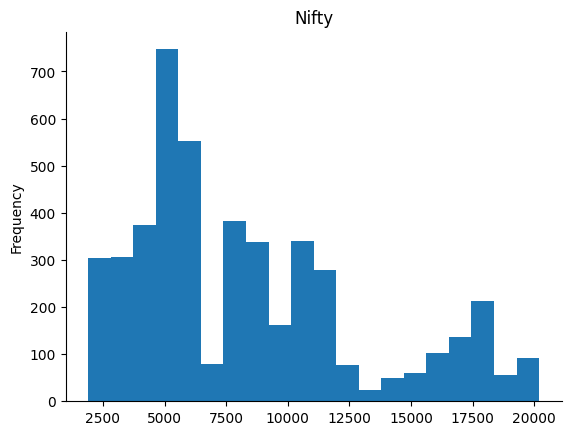

In [22]:
data['Nifty'].plot(kind='hist', bins=20, title='Nifty')
plt.gca().spines[['top', 'right',]].set_visible(False)

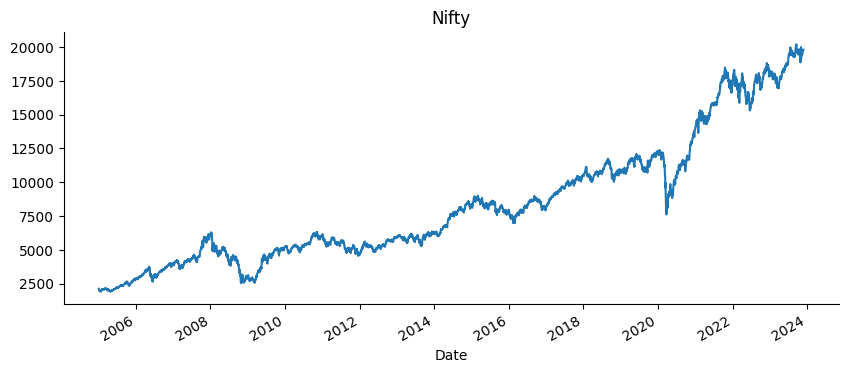

In [17]:

data['Nifty'].plot(kind='line', figsize=(10, 4), title='Nifty')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
closing_price = data['Nifty'].values.reshape(-1,1)

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
closing_price_scaled = scaler.fit_transform(closing_price)

In [28]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)


In [30]:
# Define sequence length
sequence_length = 10

# Create sequences
X, y = create_sequences(closing_price_scaled, sequence_length)

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Reshape input for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [33]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
117/117 [==============================] - 7s 12ms/step - loss: 0.0085
Epoch 2/50
117/117 [==============================] - 1s 12ms/step - loss: 1.5682e-04
Epoch 3/50
117/117 [==============================] - 1s 12ms/step - loss: 1.4229e-04
Epoch 4/50
117/117 [==============================] - 1s 12ms/step - loss: 1.6153e-04
Epoch 5/50
117/117 [==============================] - 2s 14ms/step - loss: 1.4141e-04
Epoch 6/50
117/117 [==============================] - 2s 19ms/step - loss: 1.4219e-04
Epoch 7/50
117/117 [==============================] - 2s 19ms/step - loss: 1.4079e-04
Epoch 8/50
117/117 [==============================] - 2s 18ms/step - loss: 1.3845e-04
Epoch 9/50
117/117 [==============================] - 1s 12ms/step - loss: 1.4083e-04
Epoch 10/50
117/117 [==============================] - 1s 12ms/step - loss: 1.4126e-04
Epoch 11/50
117/117 [==============================] - 1s 12ms/step - loss: 1.3787e-04
Epoch 12/50
117/117 [==============================] - 1

In [36]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

30/30 [==============================] - 1s 4ms/step


In [37]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 15588.79629232344


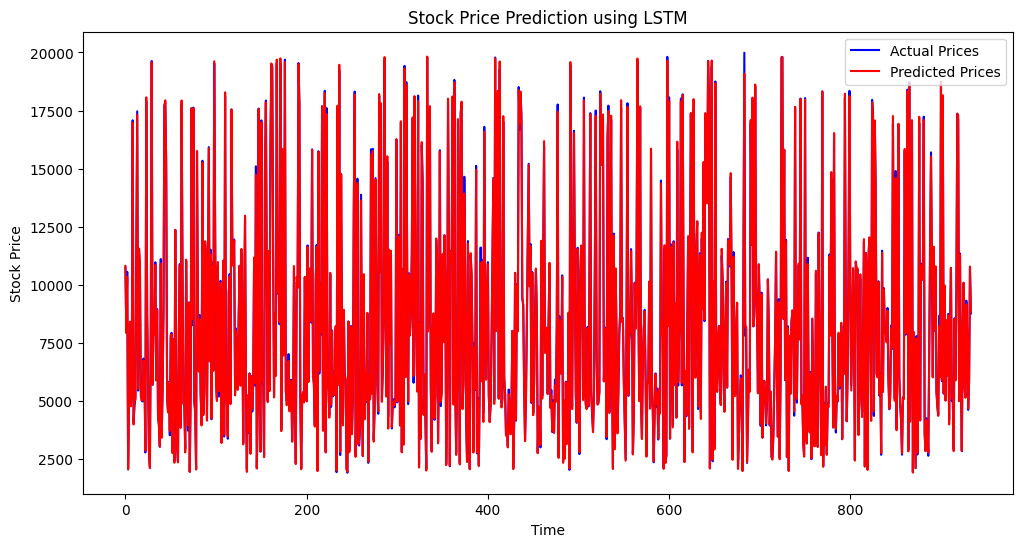

In [38]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()